In [1]:
import numpy as np
import matplotlib.pyplot as plt

class Bandit:
    """
    Implementación de un Bandido Multibrazo (Multi-Armed Bandit) basado
    en una distribución binomial

    Parámetros
    ----------
    number: integer
        Número de recompensas que puede devolver el agente
    probability : float
        Probabilidad de que el objeto devuelva una recompensa
    
    Métodos
    -------
    pull :
        Realiza una tirada en el bandido
        
    """
    def __init__(self, probability, number=1):
        self.number = number
        self.probability = probability
        
        self.reward = self.number * self.probability
        
        
    def pull(self):        
        return np.random.binomial(self.number, self.probability)
    
    
class Epsilon:
    """
    Agente que soluciona el problema del el Bandido Multibrazo
    (Multi-Armed Bandit) mediante el uso de una estrategia Epsilon
    Greedy
    
    Parámetros
    ----------
    bandits : array of Bandit
        Vector con los bandidos con los que se debe jugar
    epsilon : float
        Porcentaje de veces en las que el agente jugada de forma
        aleatoria
    decay : float
        Velocidad con la que decae la probabilidad de seleccionar una
        jugada al azar
        
    Métodos
    -------
    run :
        Realiza una tirada en el bandido
    average_reward :
        Obtención de la recompensa promedio
    plot :
        Representación gráfica del histórico de jugadas
    reset :
        Reinicia el agente
    """
    
    def __init__(self, bandits, epsilon=0.05, decay=1):
        self.bandits = bandits
        self.epsilon = epsilon
        self.decay = decay
        
        self.reset()
        
    def run(self, episodes=1):
        for i in range(episodes):
            prob = np.random.random()
            
            # Selección entre la jugada aleatoria o avariciosa
            if prob < self._epsilon:
                bandit = np.random.choice(len(bandits))
            else:
                max_bandits = np.where(self._mean == np.max(self._mean))[0]
                bandit = np.random.choice(max_bandits)

            # Decaimiento del parámetro epsilon
            self._epsilon *= self.decay
            
            # Obtención de una nueva recompensa
            reward = bandits[bandit].pull()
            
            # Agregación de la recompensa al listado
            self._rewards.append(reward)
            
            # Actualización de la media
            self._plays[bandit] += 1
            self._mean[bandit] = (1 - 1.0/self._plays[bandit]) * self._mean[bandit] \
                                 + 1.0/self._plays[bandit] * reward
        
        return self.average_reward()
    
    
    def average_reward(self):
        return np.mean(self._rewards)
    
    
    def plot(self, log=False, reference=False, label=None):
        cumulative_average = np.cumsum(self._rewards) / (np.arange(len(self._rewards)) + 1)
        
        if label is None:
            plt.plot(range(len(self._rewards)), cumulative_average)
        else:
            plt.plot(range(len(self._rewards)), cumulative_average, label=label)
            
        if reference:
            for reward in [b.reward for b in self.bandits]:
                plt.plot([0, len(self._rewards)], [reward, reward],
                         label=f'reward={reward}')
                
        if log:
            plt.xscale('log')
    
    
    def reset(self):
        self._epsilon = self.epsilon
        self._rewards = []
        self._plays = [0] * len(self.bandits)
        self._mean = [0] * len(self.bandits)  

In [2]:
np.random.seed(0)

bandits = [Bandit(0.02), Bandit(0.06), Bandit(0.10)]

epsilon = Epsilon(bandits)
decay = Epsilon(bandits, epsilon=1, decay=0.999)

In [3]:
# Repeticiones: 10.000
print(epsilon.run(10000))
print(decay.run(10000))

0.0937
0.0947


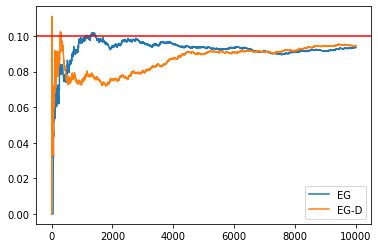

In [4]:
# Plot
epsilon.plot(log=False,label='EG')
decay.plot(log=False,label='EG-D')
plt.axhline(y=0.1, color='r', linestyle='-')
plt.legend();

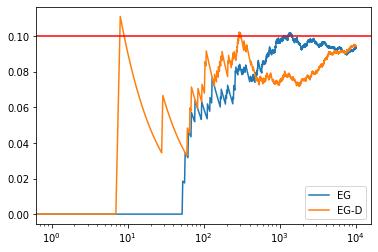

In [5]:
# Plot
epsilon.plot(log=True,label='EG')
decay.plot(log=True,label='EG-D')
plt.axhline(y=0.1, color='r', linestyle='-')
plt.legend();

In [6]:
# Repeticiones: 1.000.000
epsilon.reset()
decay.reset()
print(epsilon.run(1000000))
print(decay.run(1000000))

0.098399
0.099713


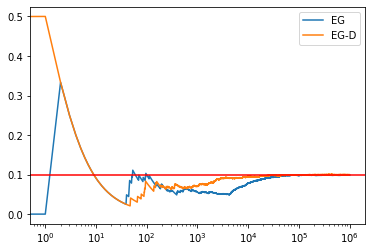

In [7]:
# Plot
epsilon.plot(log=True,label='EG')
decay.plot(log=True,label='EG-D')
plt.axhline(y=0.1, color='r', linestyle='-')
plt.legend();

# Otro ejemplo:

In [14]:
epsilon.reset()
decay.reset()

np.random.seed(0)

bandits = [Bandit(0.2), Bandit(0.5), Bandit(0.75)]

epsilon = Epsilon(bandits)
decay = Epsilon(bandits, epsilon=1, decay=0.999)

In [15]:
# Repeticiones: 100.000
print(epsilon.run(100000))
print(decay.run(100000))

0.73544
0.74972


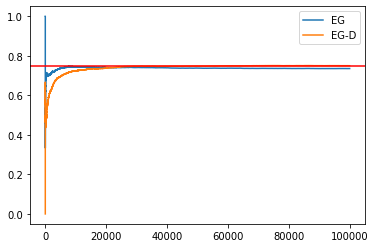

In [16]:
# Plot
epsilon.plot(log=False,label='EG')
decay.plot(log=False,label='EG-D')
plt.axhline(y=0.75, color='r', linestyle='-')
plt.legend();

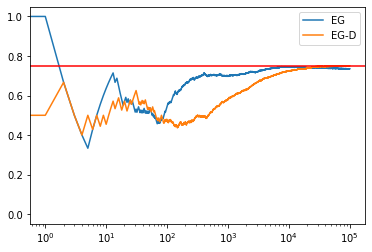

In [17]:
# Plot
epsilon.plot(log=True,label='EG')
decay.plot(log=True,label='EG-D')
plt.axhline(y=0.75, color='r', linestyle='-')
plt.legend();

# Diferentes epsilon sin decaimiento

In [41]:
np.random.seed(3)
epsilon1.reset()
epsilon2.reset()
epsilon3.reset()
bandits = [Bandit(0.2), Bandit(0.5), Bandit(0.75)]
epsilon1 = Epsilon(bandits,epsilon=0.01)
epsilon2 = Epsilon(bandits,epsilon=0.05)
epsilon3 = Epsilon(bandits,epsilon=0.1)

In [42]:
# Repeticiones: 10.000
print(epsilon1.run(10000))
print(epsilon2.run(10000))
print(epsilon3.run(10000))

0.7494
0.7439
0.7175


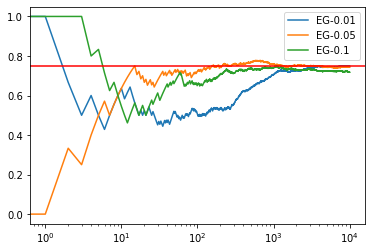

In [43]:
# Plot
epsilon1.plot(log=True,label='EG-0.01')
epsilon2.plot(log=True,label='EG-0.05')
epsilon3.plot(log=True,label='EG-0.1')
plt.axhline(y=0.75, color='r', linestyle='-')
plt.legend();

In [44]:
# Repeticiones: 1.000.000
epsilon1.reset()
epsilon2.reset()
epsilon3.reset()
np.random.seed(3)
print(epsilon1.run(1000000))
print(epsilon2.run(1000000))
print(epsilon3.run(1000000))

0.746156
0.737118
0.723072


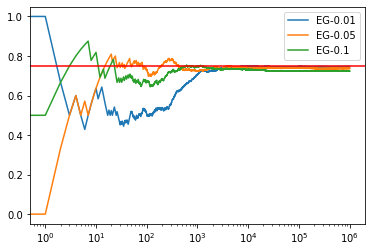

In [46]:
# Plot
epsilon1.plot(log=True,label='EG-0.01')
epsilon2.plot(log=True,label='EG-0.05')
epsilon3.plot(log=True,label='EG-0.1')
plt.axhline(y=0.75, color='r', linestyle='-')
plt.legend();